In [1]:
#Import LIBRARIES
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data clean up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply( lambda x: ast.literal_eval(x) if pd.notna(x) else x)

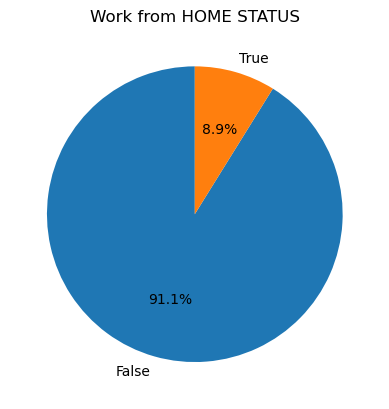

In [11]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work from HOME STATUS')
plt.ylabel('')
plt.show()


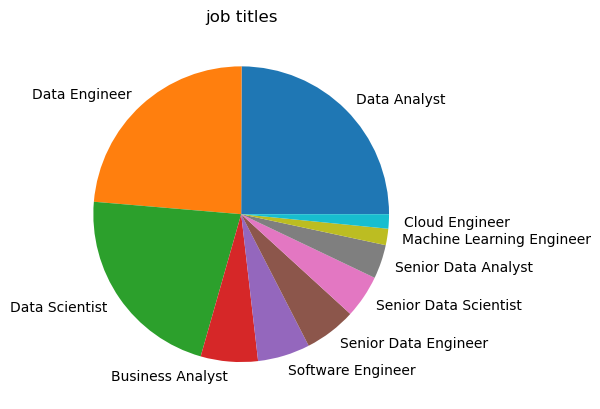

In [5]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title('job titles')
plt.ylabel('')
plt.show()

In [14]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


0 job_work_from_home Work from home
1 job_no_degree_mention Job Degree Req.
2 job_health_insurance Health Insurance Offered


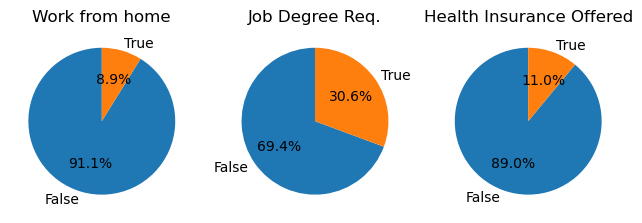

In [24]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work from home', 
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'

}

for i,  (column, title) in enumerate(dict_column.items()):
    print(i, column, title)
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)


fig.tight_layout()
plt.show()

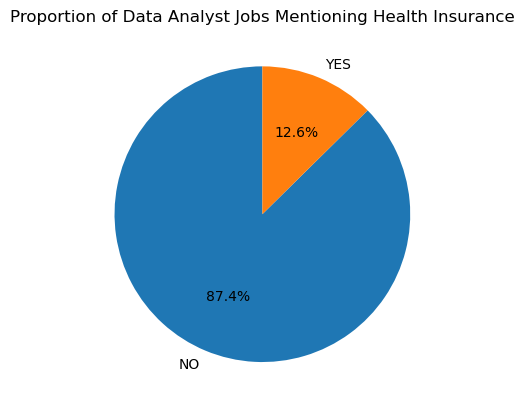

In [36]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

health = df_DA['job_health_insurance'].value_counts()


plt.pie(health, startangle=90, autopct='%1.1f%%', labels=['NO', 'YES'] )
plt.title('Proportion of Data Analyst Jobs Mentioning Health Insurance')
plt.show()


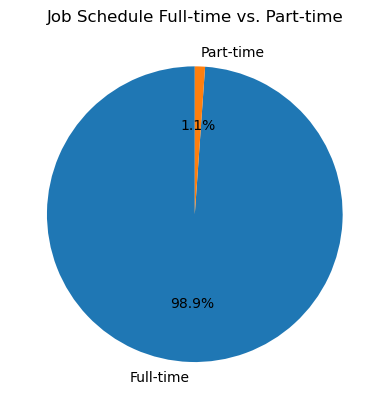

In [52]:
df_ft_pt = df[(df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] == 'Part-time')].copy()

job_type_count = df_ft_pt['job_schedule_type'].value_counts()

plt.pie(job_type_count,startangle=90, autopct='%1.1f%%', labels= job_type_count.index)
plt.title('Job Schedule Full-time vs. Part-time')
plt.show()

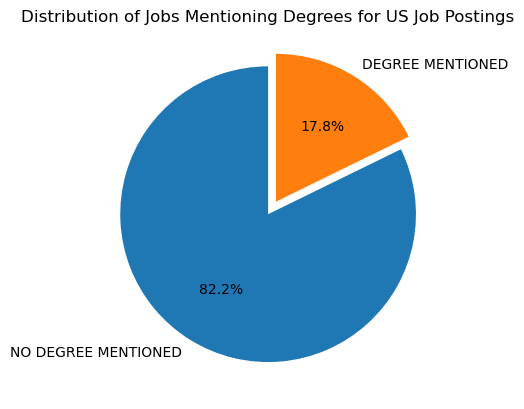

In [72]:
df_US = df[df['job_country'] == 'United States'].copy()

degree_count = df_US['job_no_degree_mention'].value_counts()

plt.pie(degree_count, labels=['NO DEGREE MENTIONED', 'DEGREE MENTIONED'], explode=(0, 0.1), startangle=90, autopct='%1.1f%%')
plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')
plt.show()